# classifications avec TF

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np
import h5py


# Vérifier la version de TensorFlow
print(f"TensorFlow version: {tf.__version__}")



TensorFlow version: 2.15.0
GPU disponible: []


2025-03-03 17:28:18.166765: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-03-03 17:28:18.167193: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [6]:
from utilities import *
X_train, y_train, X_test, y_test = load_data()

Shape des données d'entraînement: (1000, 64, 64)
Shape des données de test: (200, 64, 64)


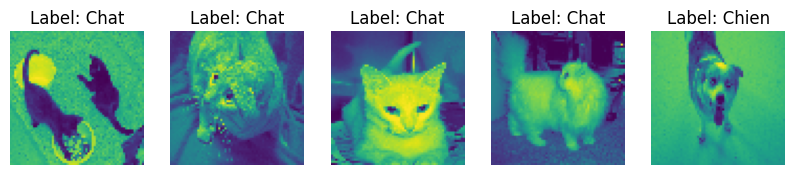

In [7]:
# Normalisation des données
X_train = X_train / 255.0
X_test = X_test / 255.0

# Affichage de quelques informations sur les données
print(f"Shape des données d'entraînement: {X_train.shape}")
print(f"Shape des données de test: {X_test.shape}")

# Visualisation de quelques images
plt.figure(figsize=(10, 4))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_train[i])
    plt.title(f"Label: {'Chat' if y_train[i] == 0 else 'Chien'}")
    plt.axis('off')
plt.show()


In [15]:
if len(X_train.shape) == 3:
    X_train = X_train[..., np.newaxis]  # Ajoute un canal pour les images en niveaux de gris
    X_test = X_test[..., np.newaxis]
# Affichons la forme de nos données
print("Forme de X_train:", X_train.shape)

Forme de X_train: (1000, 64, 64, 1)


In [32]:


# Création du modèle CNN avec explications
model = Sequential([
    # Première couche de convolution
    # 32 : nombre de filtres (détecteurs de caractéristiques)
    # (3, 3) : taille de la fenêtre de convolution
    # activation='relu' : fonction d'activation qui garde les valeurs positives
    # input_shape : forme de nos images (hauteur, largeur, canaux)
    Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]),
    # Réduction de la dimension spatiale par 2
    MaxPooling2D(2, 2),
    
    # Deuxième couche de convolution : plus de filtres pour détecter des motifs plus complexes
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    # Troisième couche de convolution : encore plus de filtres
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    # Aplatissement : transformation de la matrice 3D en vecteur 1D
    Flatten(),
    
    # Couche dense avec 512 neurones
    # C'est ici que se fait la "prise de décision"
    Dense(512, activation='relu'),
    
    # Dropout : désactive aléatoirement 50% des neurones pendant l'entraînement
    # Cela évite le surapprentissage
    Dropout(0.5),
    
    # Couche de sortie : 1 neurone avec sigmoid pour la classification binaire
    # sigmoid donne une probabilité entre 0 (chat) et 1 (chien)
    Dense(1, activation='sigmoid')
])

# Affichage de l'architecture du modèle
model.summary()

# Configuration du modèle
model.compile(
    optimizer='adam',  # Algorithme d'optimisation adaptatif
    loss='binary_crossentropy',  # Fonction de perte pour classification binaire
    metrics=['accuracy']  # Mesure de la précision
)
#voir ce qui peut etre intéréssant à approfondir aux niveaux de l'optimizer et des metrics aussi

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 31, 31, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_29 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_29 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_30 (Conv2D)          (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_30 (MaxPooli  (None, 6, 6, 128)        

Epoch 1/15
25/25 [==============================] - 4s 90ms/step - loss: 0.7014 - accuracy: 0.5075 - val_loss: 0.6951 - val_accuracy: 0.4900
Epoch 2/15
25/25 [==============================] - 2s 75ms/step - loss: 0.6928 - accuracy: 0.5188 - val_loss: 0.6897 - val_accuracy: 0.5100
Epoch 3/15
25/25 [==============================] - 2s 84ms/step - loss: 0.6932 - accuracy: 0.5063 - val_loss: 0.6840 - val_accuracy: 0.5600
Epoch 4/15
25/25 [==============================] - 5s 207ms/step - loss: 0.6830 - accuracy: 0.5550 - val_loss: 0.6736 - val_accuracy: 0.4950
Epoch 5/15
25/25 [==============================] - 5s 214ms/step - loss: 0.6633 - accuracy: 0.6150 - val_loss: 0.6544 - val_accuracy: 0.6000
Epoch 6/15
25/25 [==============================] - 2s 73ms/step - loss: 0.6258 - accuracy: 0.6463 - val_loss: 0.7033 - val_accuracy: 0.6100
Epoch 7/15
25/25 [==============================] - 2s 77ms/step - loss: 0.6011 - accuracy: 0.6875 - val_loss: 0.6692 - val_accuracy: 0.5950
Epoch 8/15


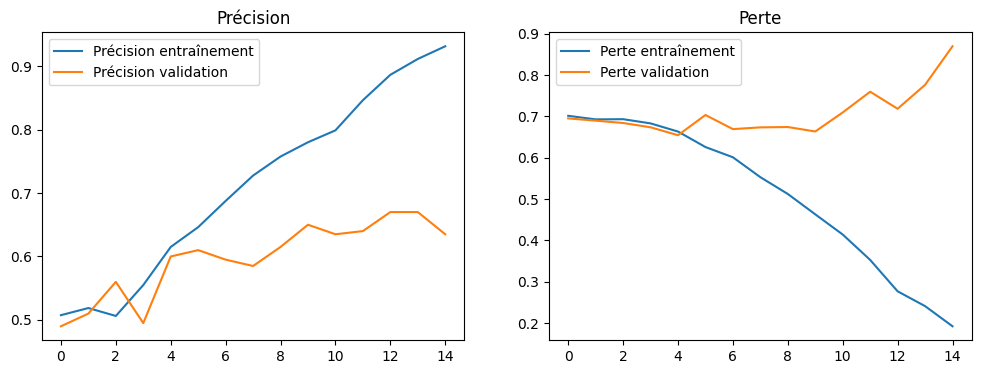

In [33]:
# Entraînement du modèle
history = model.fit(
    X_train, y_train,
    epochs=15,
    batch_size=32,
    validation_split=0.2,  # Utilise 20% des données d'entraînement pour la validation
    verbose=1
)

# Visualisation des résultats
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Précision entraînement')
plt.plot(epochs_range, val_acc, label='Précision validation')
plt.legend()
plt.title('Précision')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Perte entraînement')
plt.plot(epochs_range, val_loss, label='Perte validation')
plt.legend()
plt.title('Perte')

plt.show()

7/7 [==============================] - 0s 22ms/step - loss: 1.6390 - accuracy: 0.7300

Précision sur les données de test: 0.7300
1/1 [==============================] - 0s 53ms/step


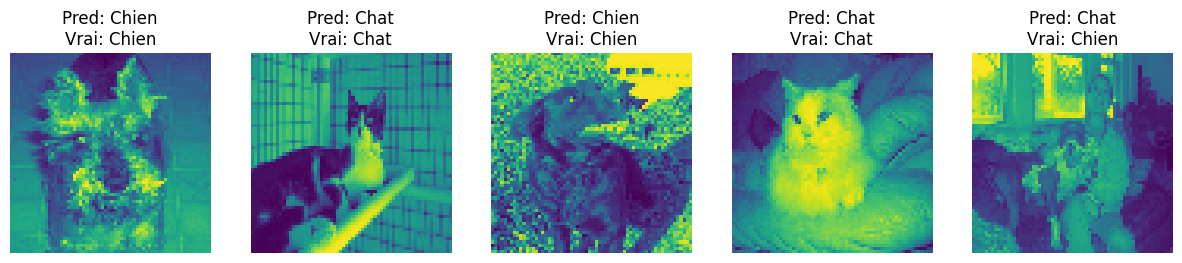

In [29]:
# Évaluation sur les données de test
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"\nPrécision sur les données de test: {test_accuracy:.4f}")

# Prédictions sur quelques images de test
predictions = model.predict(X_test[:5])

# Affichage des prédictions
plt.figure(figsize=(15, 3))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_test[i])
    pred = 'Chien' if predictions[i] > 0.5 else 'Chat'
    true = 'Chien' if y_test[i] == 1 else 'Chat'
    plt.title(f'Pred: {pred}\nVrai: {true}')
    plt.axis('off')
plt.show()

# Sauvegarde du modèle
model.save('cat_vs_dog_model.h5')